# Estudio estadistico.

In [75]:
import numpy as np
import seaborn as sns
import bokeh as bk 
import pandas as pd
import xlsxwriter

In [76]:
#Configuracion del dataframe
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [77]:
path= ('Dataframe_genre.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names

In [78]:
sheet

['frame']

In [79]:
#Funcion para el formateo de cada uno de los dataframes.
def dataframe_parser_eprime(dataframe):
    new_header=dataframe.iloc[0]
    dataframe=dataframe[1:]
    dataframe.columns=new_header
    return dataframe

#Funcion para la creacion de una lista de Dataframes
df_list=list()

def dataframe_list (df_list, sheet):
        for elements in sheet:
            df1=xl.parse(str(elements))
            df1=dataframe_parser_eprime(df1)
            df_list.append(df1)
        return df_list
    


In [80]:
df1=xl.parse(sheet_name='frame')
df2=df1.drop(['Unnamed: 0', 'Handedness', 'Nacimiento','SessionStartDateTimeUtc', 'Trial', 'Grabacion.FinishTime',
         'Clips.StartTime', 'Grabacion.StartTime','Clips.FinishTime', 'ListaG4'],axis=1)

In [81]:
df3=df2.drop(['Subject'],axis=1)
df_estilos=df3
df3


Age     Sex     Genre  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0    61   female  Jota      4                    8                    1                      1                  4                
1    61   female  Swing     3                    9                    2                      1                  4                
2    61   female  Fandango  4                    8                    2                      1                  4                
3    61   female  Habanera  8                    8                    2                      1                  5                
4    61   female  Twist     2                    5                    2                      1                  5                
..   ..      ...    ...    ..                   ..                   ..                     ..                 ..                
339  64   female  Jota      9                    1                    2                      2                  3                
340  64   female  Petenera  5                    5                    3                      1                  8                
341  64   female  Habanera  8                    7                    3                      1                  9                
342  64   female  Fandango  8                    8                    3                      1                  9                
343  64   female  Twist     9                    5                    3                      1                  9                

[344 rows x 8 columns]

In [82]:
#Cambio de nombre de la columna de los distintos dataframes.

df3=df3.rename(columns={'Age':'Edad','Sex':'Sexo','Genre':'Estilo','RespuestaActivacion':'RespuestaActivacion',
                        'RespuestaDominancia':'RespuestaDominancia','RespuestaFamiliaridad':'RespuestaFamiliaridad',
                        'RespuestaRecuerdo':'RespuestaRecuerdo',
                        'RespuestaValencia':'RespuestaValencia'})
df3.head()


Edad    Sexo    Estilo  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    female  Jota      4                    8                    1                      1                  4                
1  61    female  Swing     3                    9                    2                      1                  4                
2  61    female  Fandango  4                    8                    2                      1                  4                
3  61    female  Habanera  8                    8                    2                      1                  5                
4  61    female  Twist     2                    5                    2                      1                  5

In [83]:
#df3.info()
df3=df3.replace(to_replace="female", value="Mujer")
df3=df3.replace(to_replace="male", value="Hombre")
df3.head()

Edad   Sexo    Estilo  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    Mujer  Jota      4                    8                    1                      1                  4                
1  61    Mujer  Swing     3                    9                    2                      1                  4                
2  61    Mujer  Fandango  4                    8                    2                      1                  4                
3  61    Mujer  Habanera  8                    8                    2                      1                  5                
4  61    Mujer  Twist     2                    5                    2                      1                  5

# Carga de los distintos dataframes.

## Respuestas del usuario por Generos musicales

In [84]:

df_mean=df3.groupby('Estilo').mean()
df_mean

Edad  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
Estilo                                                                                                                     
Bolero     66.581395  5.511628             5.860465             1.441860               1.558140           5.302326         
Fandango   66.581395  5.162791             6.813953             1.604651               1.418605           6.488372         
Habanera   66.581395  5.255814             6.883721             1.511628               1.441860           6.813953         
Jota       66.581395  5.767442             6.418605             1.581395               1.558140           5.534884         
Pasodoble  66.581395  4.790698             6.488372             1.511628               1.488372           6.604651         
Petenera   66.581395  5.302326             6.790698             1.465116               1.465116           6.302326         
Swing      66.581395  5.395349             6.720930             1.441860               1.558140           5.906977         
Twist      66.581395  5.767442             6.093023             1.395349               1.604651           5.232558

In [85]:
df_std=df3.groupby('Estilo').agg(np.std)
df_std

Edad  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
Estilo                                                                                                                    
Bolero     7.339497  2.482051             2.416032             0.589686               0.502486           2.659528         
Fandango   7.339497  2.245951             1.735564             0.659709               0.499169           2.097301         
Habanera   7.339497  2.361326             1.748595             0.668050               0.502486           1.546976         
Jota       7.339497  1.949813             2.061351             0.698043               0.502486           2.403854         
Pasodoble  7.339497  2.355926             2.186235             0.668050               0.505781           2.071801         
Petenera   7.339497  1.994455             1.698152             0.630527               0.504685           2.053277         
Swing      7.339497  2.321120             2.073938             0.628768               0.502486           2.428148         
Twist      7.339497  2.398782             2.255300             0.622573               0.494712           2.697770

Graficado.

In [86]:
import matplotlib as plt 
import matplotlib.pyplot as plt

## Diagramas de violin de los Generos musicales.

In [87]:
#Creacion del vector de Generos musicales
df_generos=df3
df_estilos=df_generos

df_generos=df_generos.rename(columns={'Age':'Edad','Sex':'Sexo','Estilo':'Genero','RespuestaActivacion':'RespuestaActivacion',
                        'RespuestaDominancia':'RespuestaDominancia','RespuestaFamiliaridad':'RespuestaFamiliaridad',
                        'RespuestaRecuerdo':'RespuestaRecuerdo',
                        'RespuestaValencia':'RespuestaValencia'})


df_generos.head()

Edad   Sexo    Genero  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    Mujer  Jota      4                    8                    1                      1                  4                
1  61    Mujer  Swing     3                    9                    2                      1                  4                
2  61    Mujer  Fandango  4                    8                    2                      1                  4                
3  61    Mujer  Habanera  8                    8                    2                      1                  5                
4  61    Mujer  Twist     2                    5                    2                      1                  5

In [88]:
df_generos=df_generos.replace(to_replace="Jota", value="Tradicional")
df_generos=df_generos.replace(to_replace="Pasodoble", value="Tradicional")
df_generos=df_generos.replace(to_replace="Bolero", value="Latino")
df_generos=df_generos.replace(to_replace="Habanera", value="Latino")
df_generos=df_generos.replace(to_replace="Petenera", value="Flamenco")
df_generos=df_generos.replace(to_replace="Fandango", value="Flamenco")
df_generos=df_generos.replace(to_replace="Swing", value="Estadounidense")
df_generos=df_generos.replace(to_replace="Twist", value="Estadounidense")

df_generos.head()

Edad   Sexo          Genero  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    Mujer  Tradicional     4                    8                    1                      1                  4                
1  61    Mujer  Estadounidense  3                    9                    2                      1                  4                
2  61    Mujer  Flamenco        4                    8                    2                      1                  4                
3  61    Mujer  Latino          8                    8                    2                      1                  5                
4  61    Mujer  Estadounidense  2                    5                    2                      1                  5

## Diagrama de violin de los Generos Musicales

### Valencia

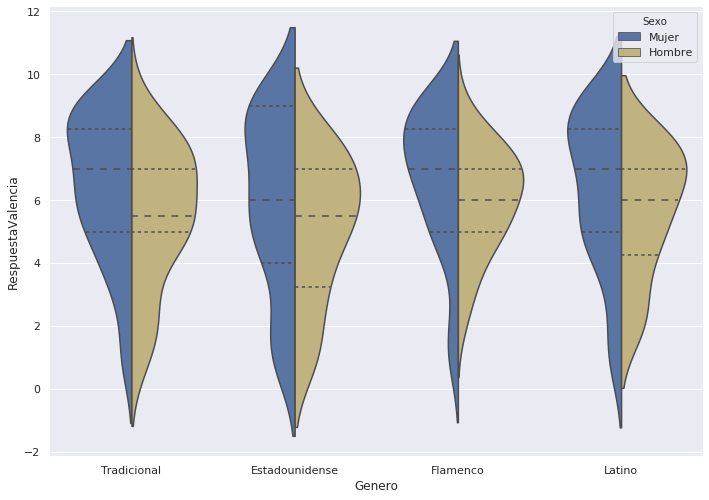

In [89]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaValencia", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df_generos)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_valencia_generos.png')

#valencia_violin.savefig('Diagrama_Violin_generos_valencia.png')

### Arousal

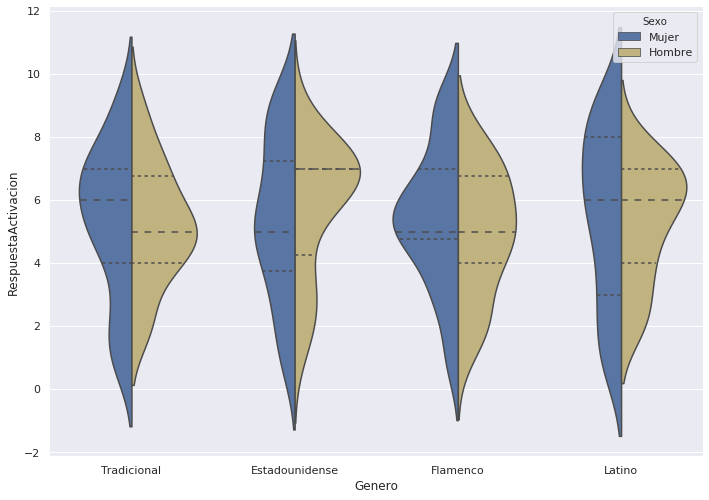

In [90]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
arousal_violin=sns.violinplot(x="Genero", y="RespuestaActivacion", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df_generos)
sns.despine(left=True)




figure=arousal_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_arousal_genero.png')

### Dominancia

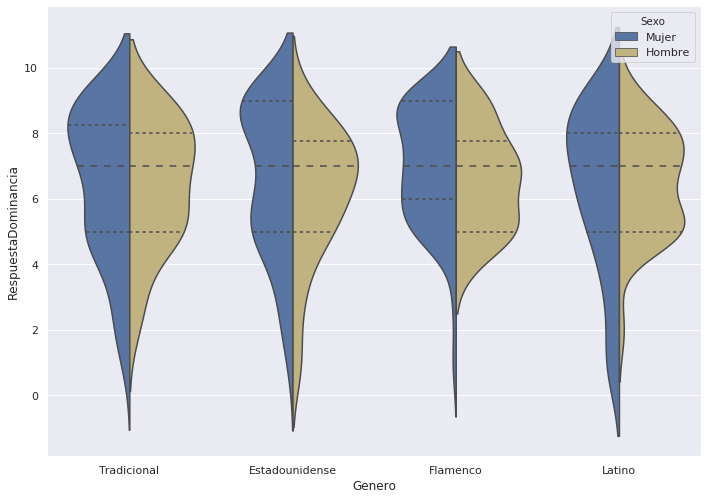

In [91]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
dominancia_violin=sns.violinplot(x="Genero", y="RespuestaDominancia", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df_generos)
sns.despine(left=True)



figure=dominancia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_dominancia_dominancia.png')

### Recuerdo

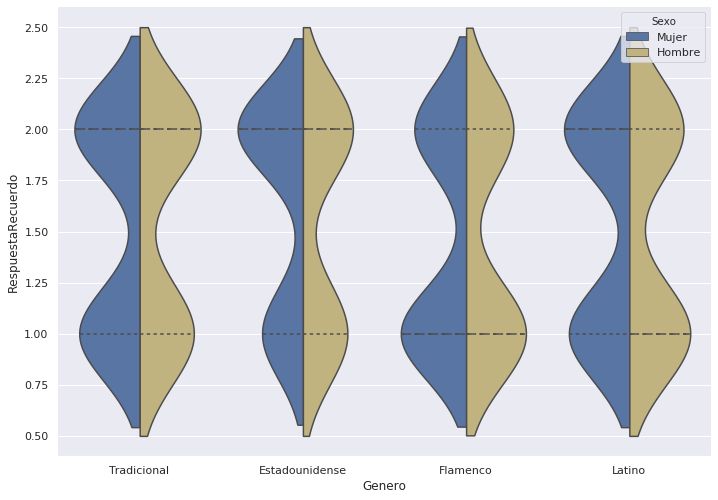

In [92]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
recuerdo_violin=sns.violinplot(x="Genero", y="RespuestaRecuerdo", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df_generos)
sns.despine(left=True)



figure=recuerdo_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_recuerdo_genero.png')

### Familiaridad

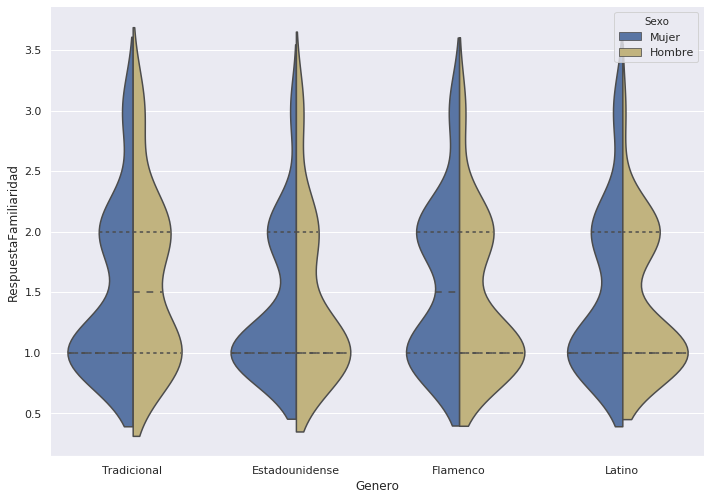

In [93]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
familiaridad_violin=sns.violinplot(x="Genero", y="RespuestaFamiliaridad", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df_generos)
sns.despine(left=True)



figure=familiaridad_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_familiaridad_genero.png')

## Diagrama de violin de los Estilos Musicales

### Valencia

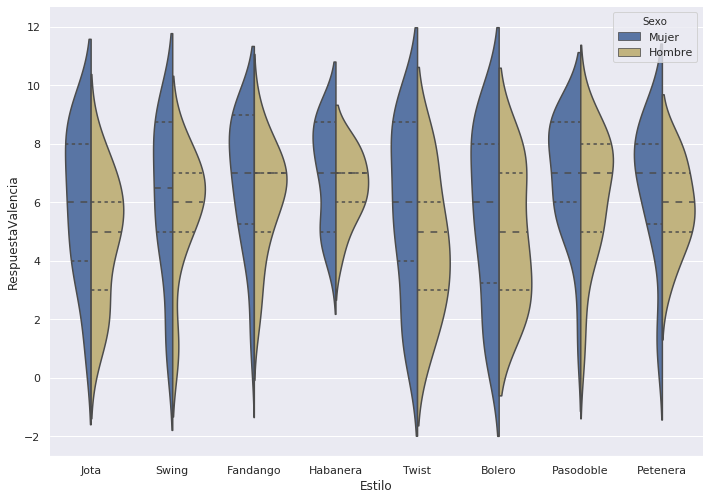

In [94]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaValencia", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df3)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_valencia_estilos.png')

#valencia_violin.savefig('Diagrama_Violin_generos_valencia.png')

### Arousal

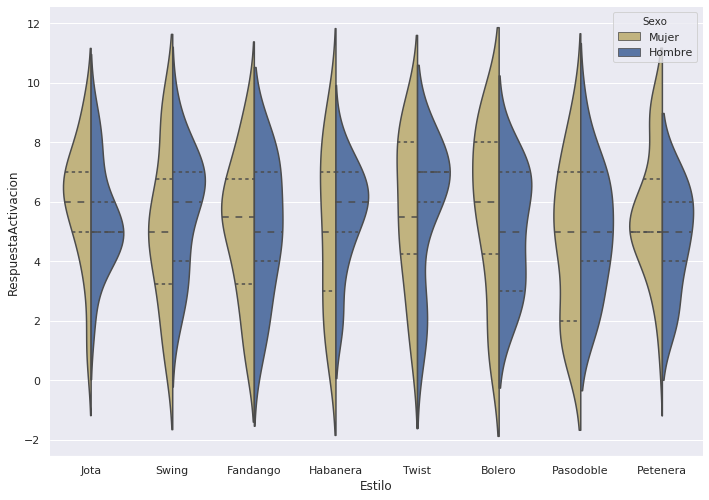

In [95]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
arousal_violin=sns.violinplot(x="Estilo", y="RespuestaActivacion", hue='Sexo',
               split=True, inner="quart",
               palette={"Mujer": "y", "Hombre": "b"},
               data=df3)
sns.despine(left=True)




figure=arousal_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_arousal_estilos.png')

### Dominancia.

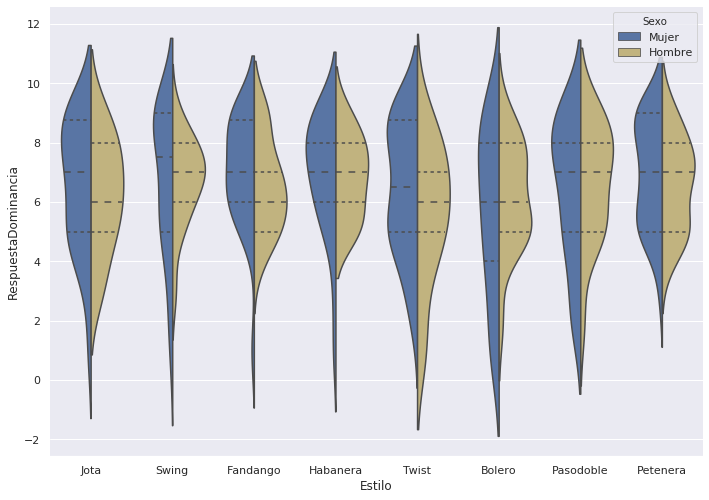

In [96]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
dominancia_violin=sns.violinplot(x="Estilo", y="RespuestaDominancia", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df3)
sns.despine(left=True)



figure=dominancia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_dominancia_estilos.png')

### Recuerdo

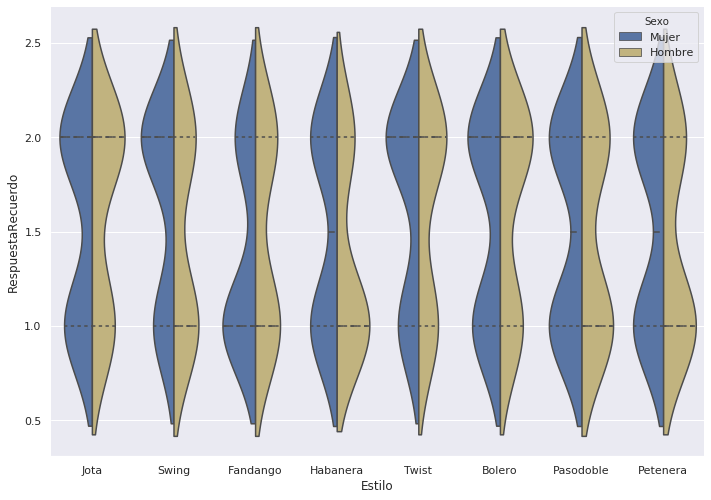

In [97]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
recuerdo_violin=sns.violinplot(x="Estilo", y="RespuestaRecuerdo", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df3)
sns.despine(left=True)



figure=recuerdo_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_recuerdo_estilos.png')

### Familiaridad

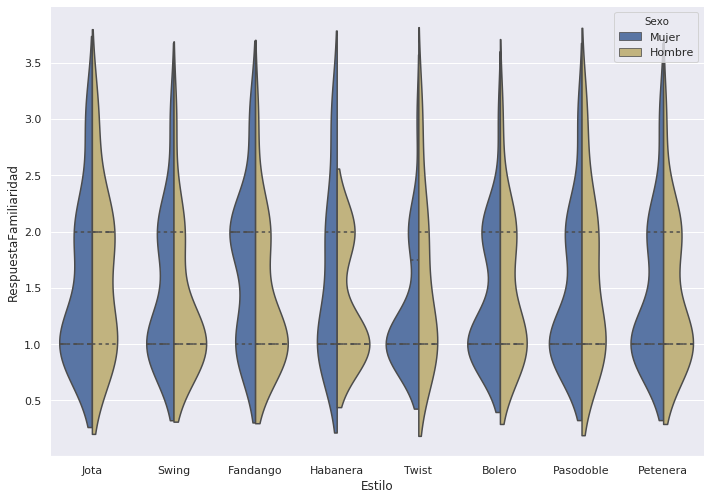

In [98]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
familiaridad_violin=sns.violinplot(x="Estilo", y="RespuestaFamiliaridad", hue='Sexo',
               split=True, inner="quart",
               palette={"Hombre": "y", "Mujer": "b"},
               data=df3)
sns.despine(left=True)



figure=familiaridad_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_familiaridad_estilos.png')

## Estratificaciones por edades y genero <65

In [99]:
df_generos_estratificado=df_generos
df_generos_estratificado.head()

Edad   Sexo          Genero  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    Mujer  Tradicional     4                    8                    1                      1                  4                
1  61    Mujer  Estadounidense  3                    9                    2                      1                  4                
2  61    Mujer  Flamenco        4                    8                    2                      1                  4                
3  61    Mujer  Latino          8                    8                    2                      1                  5                
4  61    Mujer  Estadounidense  2                    5                    2                      1                  5

In [100]:
columna_edad=df_generos_estratificado['Edad'].to_numpy()
contador=0
columna_edad_num=np.unique(columna_edad)

#Rango de las edades para todos los grupos de valor.
print(columna_edad_num)

[55 56 57 58 59 60 61 63 64 65 67 68 70 71 72 74 75 78 80 81]


In [101]:
df_generos_estratificado=df_generos_estratificado.replace(to_replace=55, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=56, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=57, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=58, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=59, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=60, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=61, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=62, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=61, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=62, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=63, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=64, value="Menores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=65, value="Menores65")


df_generos_estratificado=df_generos_estratificado.replace(to_replace=66, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=67, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=68, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=69, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=70, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=71, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=72, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=73, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=74, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=75, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=76, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=77, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=78, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=79, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=80, value="Mayores65")
df_generos_estratificado=df_generos_estratificado.replace(to_replace=81, value="Mayores65")

df_generos_estratificado

Edad   Sexo          Genero  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0    Menores65  Mujer  Tradicional     4                    8                    1                      1                  4                
1    Menores65  Mujer  Estadounidense  3                    9                    2                      1                  4                
2    Menores65  Mujer  Flamenco        4                    8                    2                      1                  4                
3    Menores65  Mujer  Latino          8                    8                    2                      1                  5                
4    Menores65  Mujer  Estadounidense  2                    5                    2                      1                  5                
..         ...    ...             ... ..                   ..                   ..                     ..                 ..                
339  Menores65  Mujer  Tradicional     9                    1                    2                      2                  3                
340  Menores65  Mujer  Flamenco        5                    5                    3                      1                  8                
341  Menores65  Mujer  Latino          8                    7                    3                      1                  9                
342  Menores65  Mujer  Flamenco        8                    8                    3                      1                  9                
343  Menores65  Mujer  Estadounidense  9                    5                    3                      1                  9                

[344 rows x 8 columns]

### Valencia por genero <65

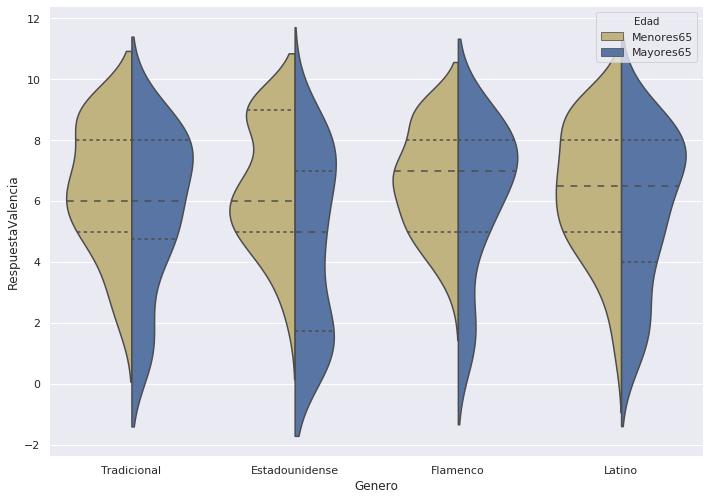

In [102]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaValencia", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_generos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_valencia_genero_estratificado.png')

###  Arousal por genero <65

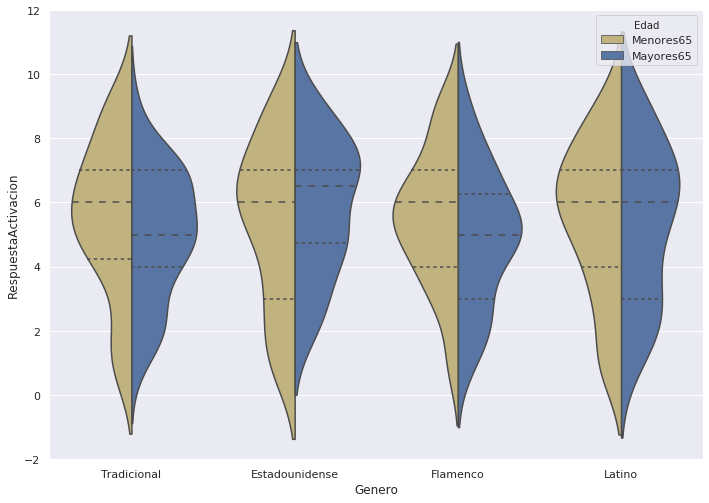

In [103]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaActivacion", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_generos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_Arousal_genero_estratificado.png')

### Dominancia por genero <65

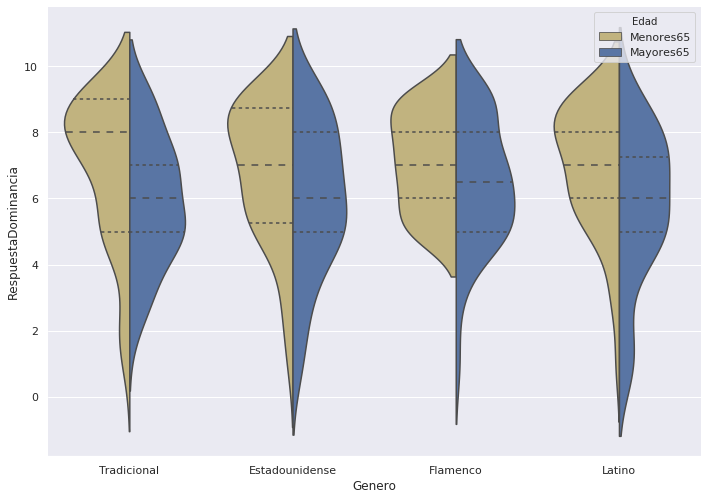

In [104]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaDominancia", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_generos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_Dominancia_genero_estratificado.png')

### Recuerdo por genero <65

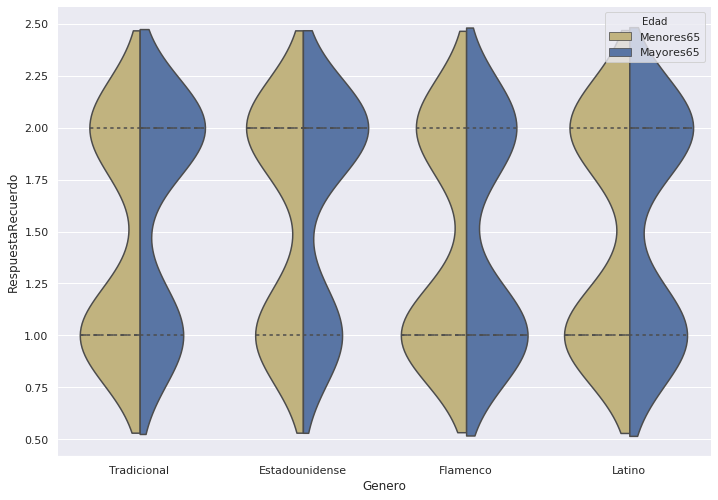

In [105]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaRecuerdo", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_generos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_Recuerdo_genero_estratificado.png')

### Familiaridad por genero <65

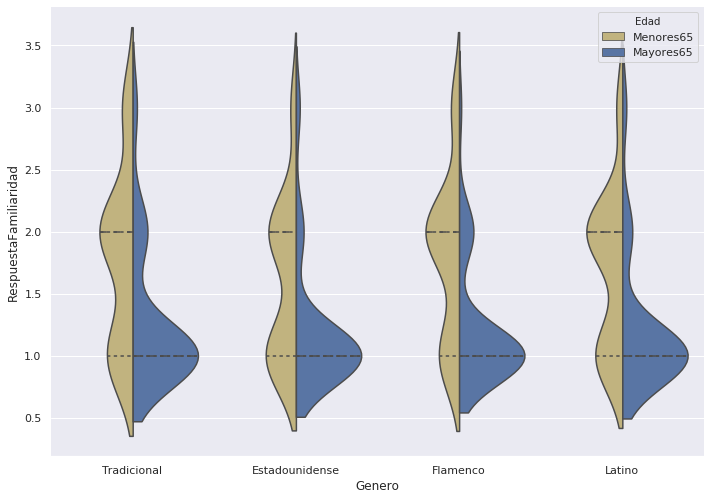

In [106]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Genero", y="RespuestaFamiliaridad", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_generos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_Familiaridad_genero_estratificado.png')

## Estratificacion por edades y por estilo <65

In [107]:
df_estilos_estratificado=df_estilos
df_estilos_estratificado.head()

Edad   Sexo    Estilo  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  61    Mujer  Jota      4                    8                    1                      1                  4                
1  61    Mujer  Swing     3                    9                    2                      1                  4                
2  61    Mujer  Fandango  4                    8                    2                      1                  4                
3  61    Mujer  Habanera  8                    8                    2                      1                  5                
4  61    Mujer  Twist     2                    5                    2                      1                  5

In [108]:
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=55, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=56, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=57, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=58, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=59, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=60, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=61, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=62, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=61, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=62, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=63, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=64, value="Menores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=65, value="Menores65")


df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=66, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=67, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=68, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=69, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=70, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=71, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=72, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=73, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=74, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=75, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=76, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=77, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=78, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=79, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=80, value="Mayores65")
df_estilos_estratificado=df_estilos_estratificado.replace(to_replace=81, value="Mayores65")

df_estilos_estratificado.head()

Edad   Sexo    Estilo  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
0  Menores65  Mujer  Jota      4                    8                    1                      1                  4                
1  Menores65  Mujer  Swing     3                    9                    2                      1                  4                
2  Menores65  Mujer  Fandango  4                    8                    2                      1                  4                
3  Menores65  Mujer  Habanera  8                    8                    2                      1                  5                
4  Menores65  Mujer  Twist     2                    5                    2                      1                  5

### Valencia por estilo <65

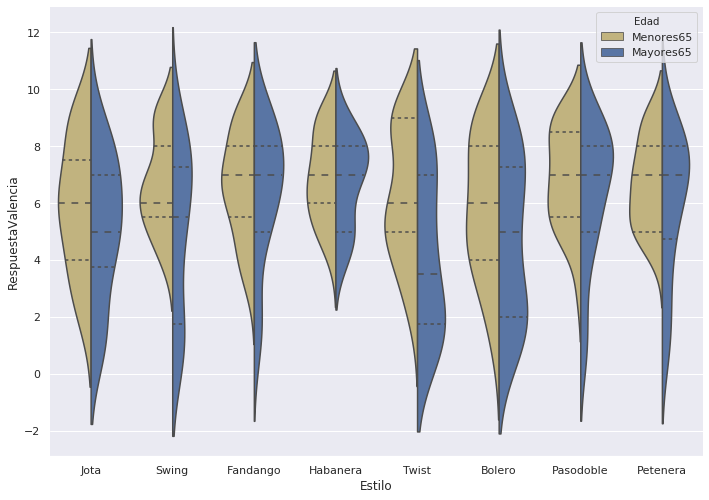

In [109]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaValencia", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_estilos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_valencia_estilos_estratificado.png')

### Arousal por estilo <65

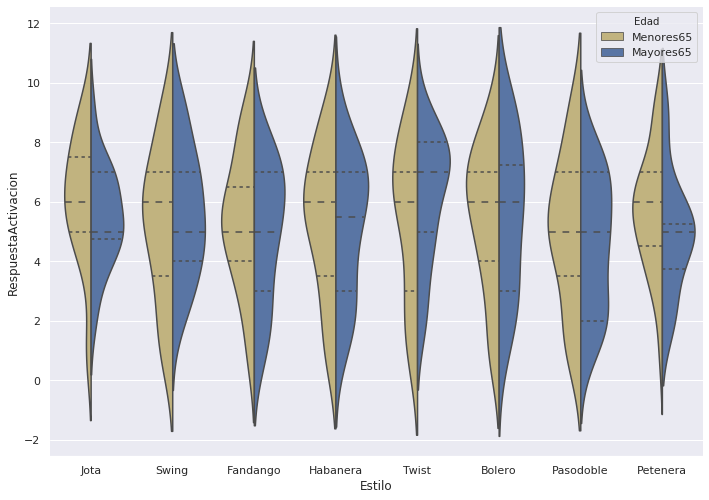

In [110]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaActivacion", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_estilos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_arousal_estilos_estratificado.png')

### Dominancia por estilo <65

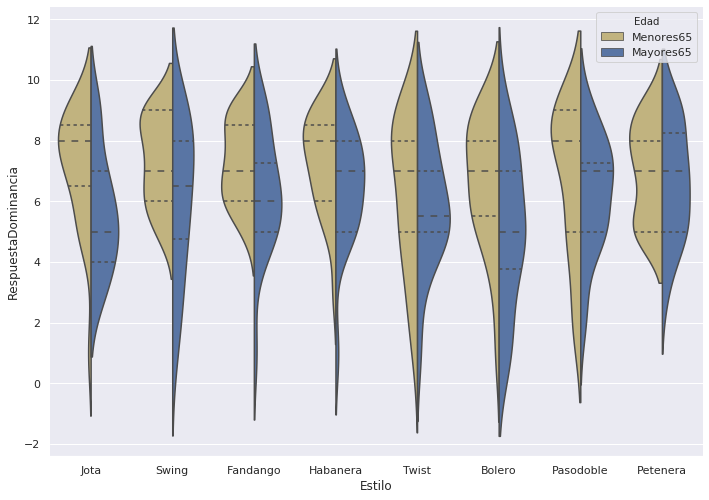

In [111]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaDominancia", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_estilos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_Dominancia_estilos_estratificado.png')

### Recuerdo por estilo <65

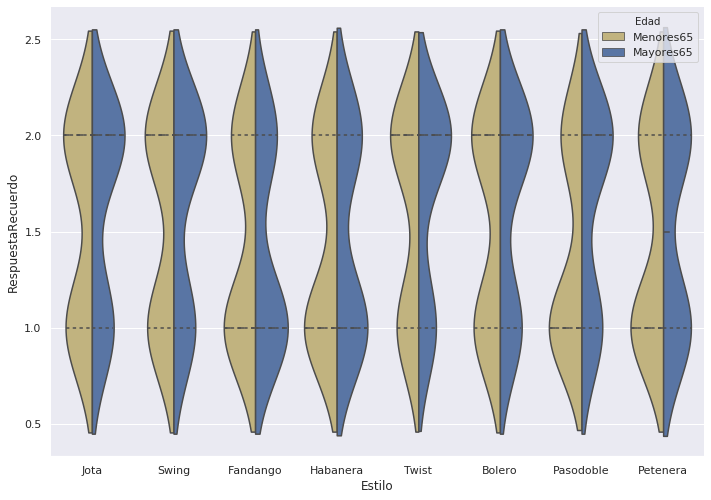

In [112]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaRecuerdo", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_estilos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_recuerdo_estilos_estratificado.png')

### Familiaridad por estilo <65

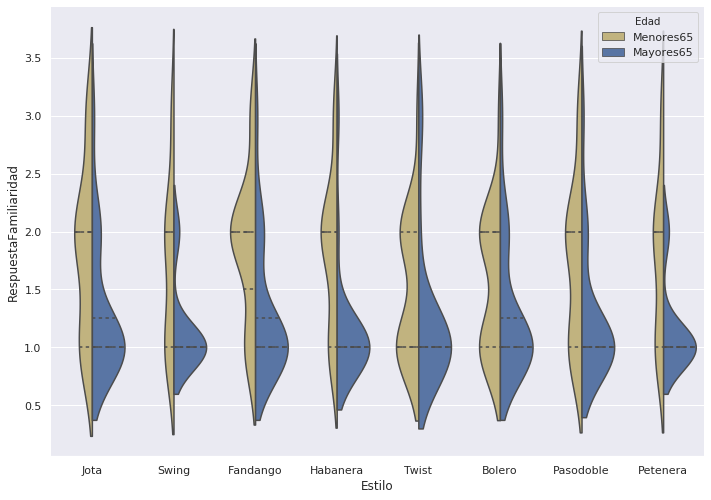

In [113]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
valencia_violin=sns.violinplot(x="Estilo", y="RespuestaFamiliaridad", hue='Edad',
               split=True, inner="quart",
               palette={"Menores65": "y", "Mayores65": "b"},
               data=df_estilos_estratificado)
sns.despine(left=True)

figure=valencia_violin.get_figure()
figure.savefig('Imagenes/diagrama-violin_familiaridad_estilos_estratificado.png')

## Agrupacion por genero musical y por grupo.

In [114]:
df3.groupby(['Estilo','Sexo']).mean()

Edad  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
Estilo    Sexo                                                                                                                    
Bolero    Hombre  66.705882  5.058824             6.176471             1.470588               1.588235           4.823529         
          Mujer   66.500000  5.807692             5.653846             1.423077               1.538462           5.615385         
Fandango  Hombre  66.705882  5.117647             6.529412             1.411765               1.470588           6.117647         
          Mujer   66.500000  5.192308             7.000000             1.730769               1.384615           6.730769         
Habanera  Hombre  66.705882  5.529412             6.823529             1.352941               1.352941           6.529412         
          Mujer   66.500000  5.076923             6.923077             1.615385               1.500000           7.000000         
Jota      Hombre  66.705882  5.470588             6.235294             1.647059               1.588235           4.764706         
          Mujer   66.500000  5.961538             6.538462             1.538462               1.538462           6.038462         
Pasodoble Hombre  66.705882  5.000000             6.647059             1.588235               1.470588           6.235294         
          Mujer   66.500000  4.653846             6.384615             1.461538               1.500000           6.846154         
Petenera  Hombre  66.705882  4.764706             6.588235             1.470588               1.411765           5.882353         
          Mujer   66.500000  5.653846             6.923077             1.461538               1.500000           6.576923         
Swing     Hombre  66.705882  5.764706             6.705882             1.352941               1.470588           5.705882         
          Mujer   66.500000  5.153846             6.730769             1.500000               1.615385           6.038462         
Twist     Hombre  66.705882  5.823529             5.588235             1.529412               1.588235           4.529412         
          Mujer   66.500000  5.730769             6.423077             1.307692               1.615385           5.692308

In [115]:
df3.groupby(['Estilo', 'Sexo']).agg(np.std)

Edad  RespuestaActivacion  RespuestaDominancia  RespuestaFamiliaridad  RespuestaRecuerdo  RespuestaValencia
Estilo    Sexo                                                                                                                   
Bolero    Hombre  8.476178  1.983387             1.776066             0.624264               0.507300           2.297697         
          Mujer   6.670832  2.757089             2.770448             0.577794               0.508391           2.871612         
Fandango  Hombre  8.476178  2.232777             1.545867             0.618347               0.514496           1.833111         
          Mujer   6.670832  2.298160             1.854724             0.666795               0.496139           2.254909         
Habanera  Hombre  8.476178  1.699913             1.380004             0.492592               0.492592           1.178858         
          Mujer   6.670832  2.726508             1.978344             0.752432               0.509902           1.743560         
Jota      Hombre  8.476178  1.736291             1.888432             0.701888               0.507300           2.107410         
          Mujer   6.670832  2.087693             2.195099             0.706018               0.508391           2.489671         
Pasodoble Hombre  8.476178  2.061553             1.934592             0.712287               0.514496           2.107410         
          Mujer   6.670832  2.560349             2.367732             0.646886               0.509902           2.053140         
Petenera  Hombre  8.476178  1.751050             1.543487             0.624264               0.507300           1.495090         
          Mujer   6.670832  2.096517             1.809377             0.646886               0.509902           2.335347         
Swing     Hombre  8.476178  1.953504             1.447615             0.606339               0.514496           2.054407         
          Mujer   6.670832  2.540745             2.425823             0.648074               0.496139           2.675530         
Twist     Hombre  8.476178  2.297697             2.346775             0.717430               0.507300           2.321574         
          Mujer   6.670832  2.506914             2.175740             0.549125               0.496139           2.867323

Graficado

### Diagrama de puntos Valencia - Arousal.

In [116]:
df4=df3.drop(['RespuestaRecuerdo', 'RespuestaDominancia', 'RespuestaFamiliaridad', 'Edad'],axis=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})

df4

Sexo    Estilo  RespuestaActivacion  RespuestaValencia
0    Mujer  Jota      4                    4                
1    Mujer  Swing     3                    4                
2    Mujer  Fandango  4                    4                
3    Mujer  Habanera  8                    5                
4    Mujer  Twist     2                    5                
..     ...    ...    ..                   ..                
339  Mujer  Jota      9                    3                
340  Mujer  Petenera  5                    8                
341  Mujer  Habanera  8                    9                
342  Mujer  Fandango  8                    9                
343  Mujer  Twist     9                    9                

[344 rows x 4 columns]

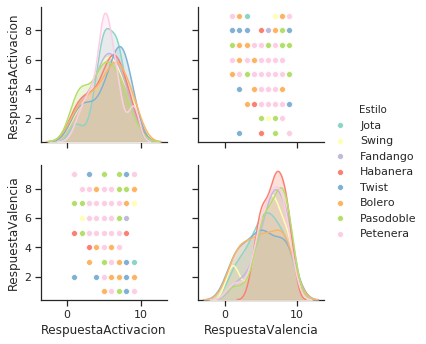

In [117]:
sns.set(style="ticks")
sns.pairplot(df4, hue='Estilo',palette="Set3", height=2.5);

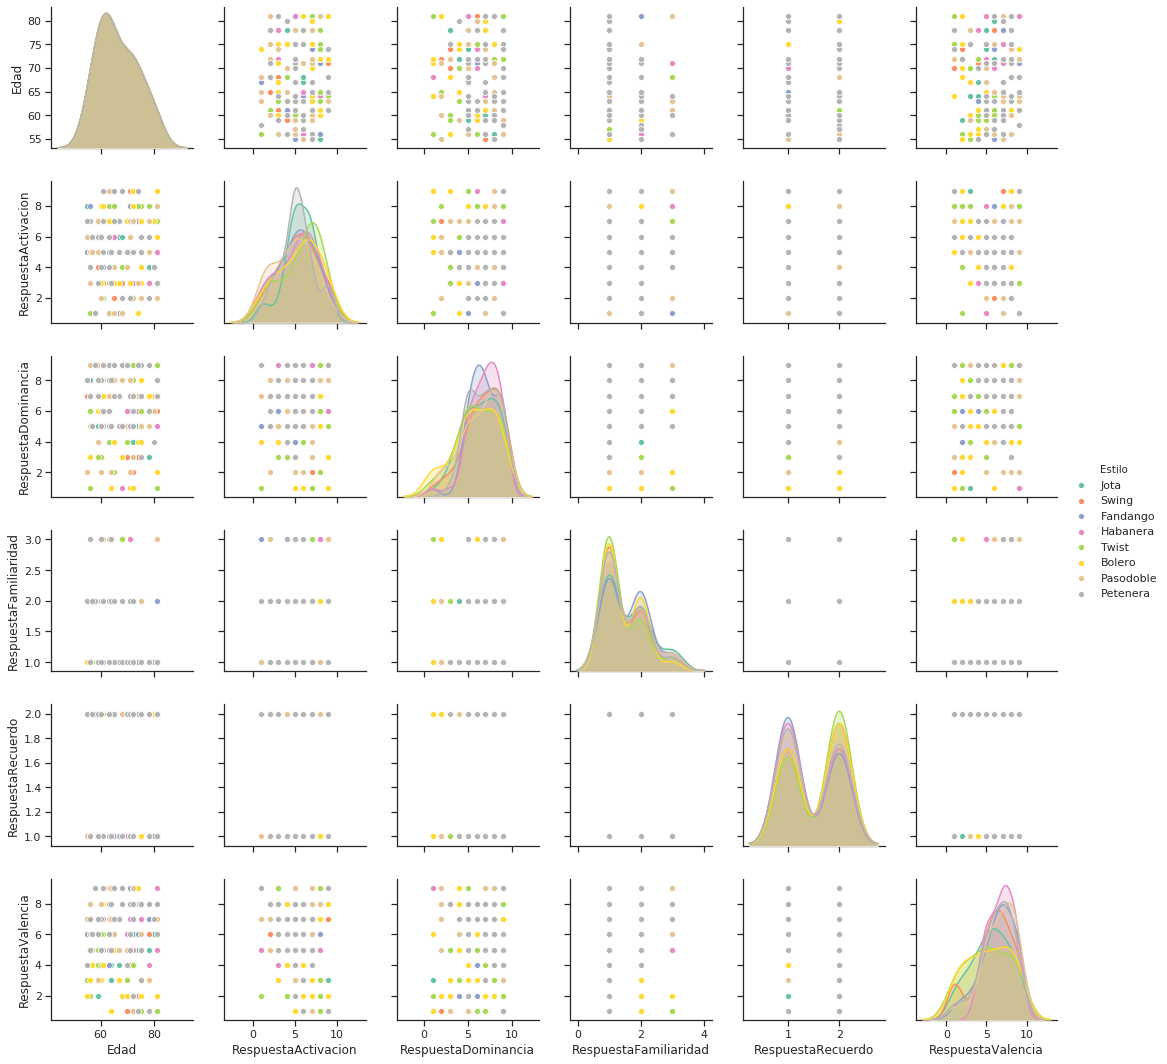

In [118]:
sns.pairplot(df3, hue='Estilo',palette="Set2", height=2.5);

Union de las distintas distribuciones Valencia/Arousal

De todos los generos musicales para determinar como ser ha dado el experimento a nivel general.

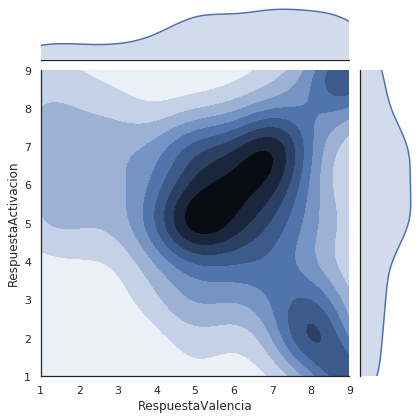

In [119]:
with sns.axes_style('white'):
    valencia_arousal=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df3, kind='kde', xlim=(1,9), ylim=(1,9))
    
#figure=valencia_arousal.get_figure()
valencia_arousal.savefig('Imagenes/valecia_vs_arousal_total.png')

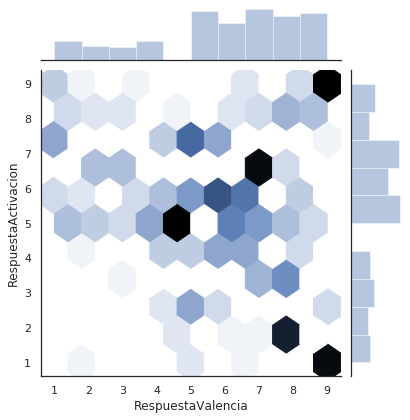

In [120]:
with sns.axes_style('white'):
    valencia_arousal_respuestas=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df3, kind='hex')
    
    
valencia_arousal_respuestas.savefig('Imagenes/valecia_vs_arousal_total_respuestas.png')

Diagrama de Russel

In [121]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Jaime_Castro-Martinez/publication/301937985/figure/download/fig2/AS:362523099451414@1463443650997/Model-blending-prototypical-emotions-and-core-affect-Source-Russell-and-Feldman-Barret.png",width=400, height=400)

### Medias condicionales con medidas

1. Combinacion de los generos dos a dos 
2. quitar el fondo de las distribuciones
3. https://seaborn.pydata.org/examples/scatter_bubbles.html
3. Evaluacion del PANAS


###  Valencia vs Arousal por generos.

In [124]:
#dataframe_bolero=dataframe_by_genre[(dataframe_by_genre.Genre == 'Bolero') ]

df_generos_latino=df_generos[(df_generos.Genero=='Latino')]
df_generos_tradicional=df_generos[(df_generos.Genero=='Tradicional')]
df_generos_flamenco=df_generos[(df_generos.Genero=='Flamenco')]
df_generos_estadounidense=df_generos[(df_generos.Genero=='Estadounidense')]

#### Genero Latino.

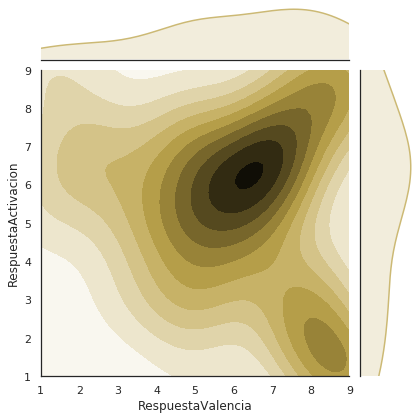

In [126]:
with sns.axes_style('white'):
    latino_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_generos_latino, kind='kde', 
                  color=color_paleta, xlim=(1,9), ylim=(1,9))
latino_plot.savefig("Imagenes/Latino_generos_plot.png")

#### Genero Tradicional.

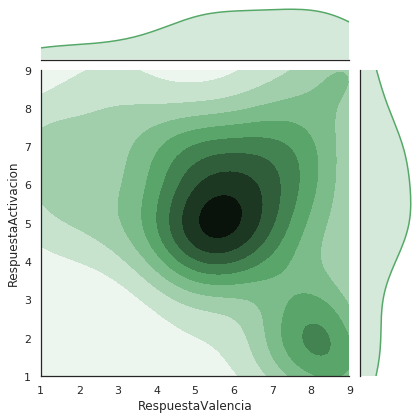

In [127]:
with sns.axes_style('white'):
    tradicional_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_generos_tradicional, kind='kde', 
                  color=color_paleta1, xlim=(1,9), ylim=(1,9))
tradicional_plot.savefig("Imagenes/Tradicional_generos_plot.png")

#### Genero Flamenco.

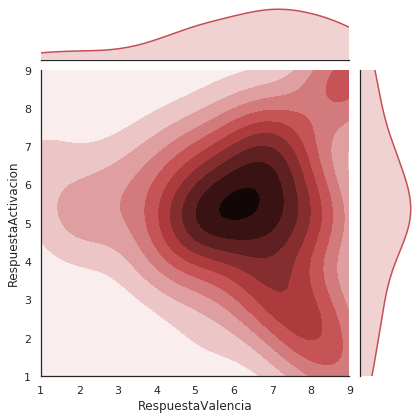

In [128]:
with sns.axes_style('white'):
    flamenco_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_generos_flamenco, kind='kde', 
                  color=color_paleta2, xlim=(1,9), ylim=(1,9))
flamenco_plot.savefig("Imagenes/Flamenco_generos_plot.png")

#### Genero Estadounidense.

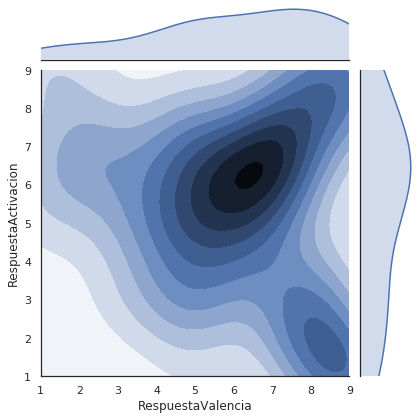

In [129]:
with sns.axes_style('white'):
    estadounidense_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_generos_latino, kind='kde', 
                  color=color_paleta3, xlim=(1,9), ylim=(1,9))
estadounidense_plot.savefig("Imagenes/estadounidense_generos_plot.png")

###  Valencia vs Arousal por estilos.

In [48]:
color_paleta='y'
color_paleta1='g'
color_paleta2='r'
color_paleta3='b'

#### Bolero

In [49]:
path= ('1.Dataframe_genre_bolero.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_bolero=xl.parse(sheet_name='bolero')

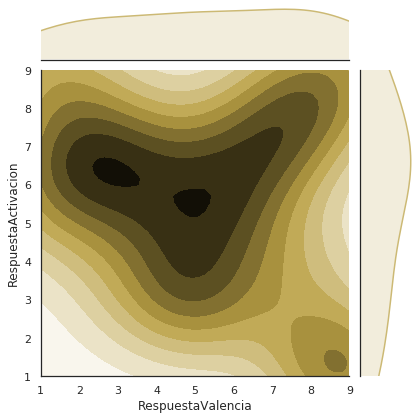

In [50]:
with sns.axes_style('white'):
    bolero_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_bolero, kind='kde', 
                  color=color_paleta, xlim=(1,9), ylim=(1,9))
bolero_plot.savefig("bolero_plot.png")

#### Fandango

In [51]:
path= ('2.Dataframe_genre_fandango.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_fandango=xl.parse(sheet_name='fandango')

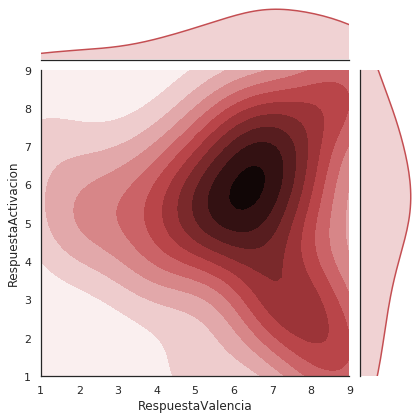

In [52]:
with sns.axes_style('white'):
    fandango_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_fandango, kind='kde',
                  color=color_paleta2, xlim=(1,9), ylim=(1,9))
fandango_plot.savefig("fandango_plot.png")

#### Habanera

In [53]:
path= ('3.Dataframe_genre_habanera.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_habanera=xl.parse(sheet_name='habanera')

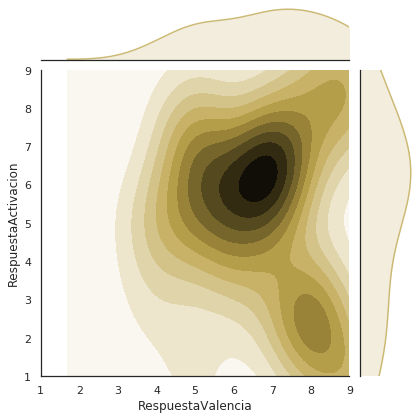

In [54]:
with sns.axes_style('white'):
    habanera_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_habanera, kind='kde',
                  color=color_paleta,xlim=(1,9), ylim=(1,9))
    
habanera_plot.savefig("habanera_plot.png")

#### Jota

In [55]:
path= ('4.Dataframe_genre_jota.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_jota=xl.parse(sheet_name='jota')

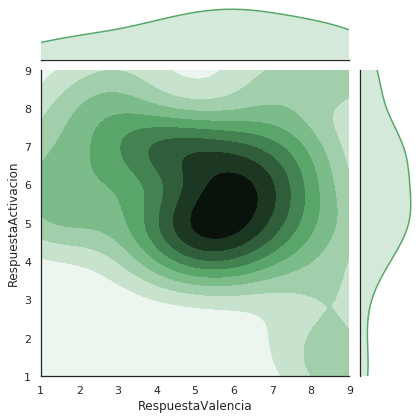

In [56]:
with sns.axes_style('white'):
    jota_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_jota, kind='kde',
                  color=color_paleta1, xlim=(1,9), ylim=(1,9))
jota_plot.savefig("jota_plot.png")

#### Pasodoble

In [57]:
path= ('5.Dataframe_genre_pasodoble.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_pasodoble=xl.parse(sheet_name='pasodoble')

In [58]:
df_pasodoble_parse=df_pasodoble.drop(['Unnamed: 0', 'Age', 'RespuestaFamiliaridad','RespuestaRecuerdo', 'RespuestaDominancia'], axis=1)

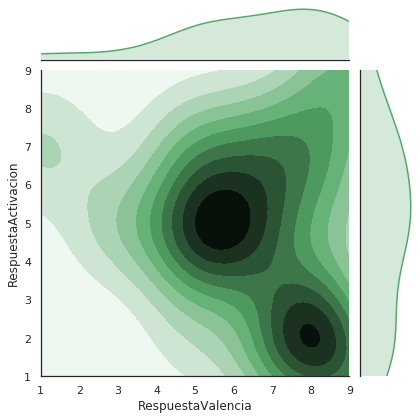

In [59]:
with sns.axes_style('white'):
    pasodoble_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_pasodoble_parse, kind='kde',
                  color=color_paleta1, xlim=(1,9), ylim=(1,9))
pasodoble_plot.savefig("pasodoble_plot.png")


#### Petenera

In [60]:
path= ('6.Dataframe_genre_petenera.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_petenera=xl.parse(sheet_name='petenera')

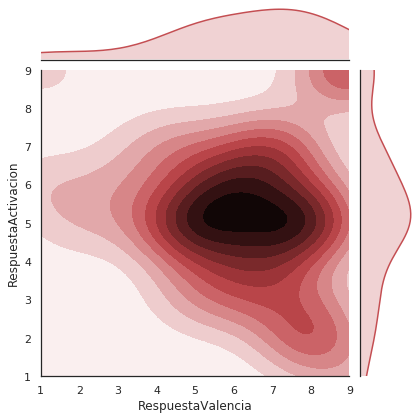

In [61]:
with sns.axes_style('white'):
    petenera_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_petenera, kind='kde',
                  color=color_paleta2, xlim=(1,9), ylim=(1,9))
    
petenera_plot.savefig("petenera_plot.png")

#### Swing 

In [62]:
path= ('7.Dataframe_genre_swing.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_swing=xl.parse(sheet_name='swing')

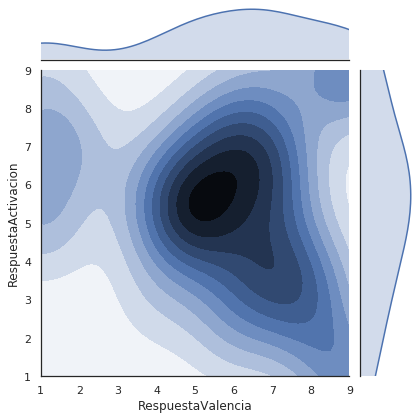

In [63]:
with sns.axes_style('white'):
    swing_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_swing, kind='kde',
                  color=color_paleta3, xlim=(1,9), ylim=(1,9))
    
swing_plot.savefig("swing_plot.png")

#### Twist

In [64]:
path= ('8.Dataframe_genre_twist.xlsx')
xl=pd.ExcelFile(path)
sheet=xl.sheet_names
df_twist=xl.parse(sheet_name='twist')

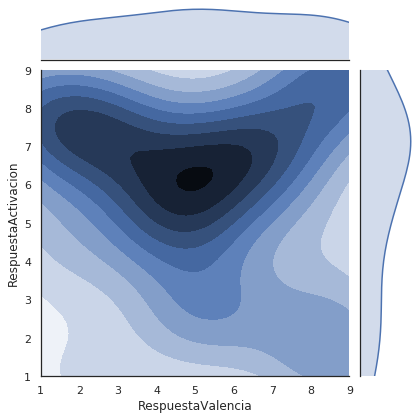

In [65]:
with sns.axes_style('white'):
    twist_plot=sns.jointplot("RespuestaValencia", "RespuestaActivacion", data=df_twist, kind='kde',
                  color=color_paleta3, xlim=(1,9), ylim=(1,9))
    #twist_plot.annotate(stats.pearsonr)
twist_plot.savefig("twist_plot.png")

## Agrupacion dos a dos

1. Bolero vs Habanera
2. Pasodoble vs Jota
3. Fandango vs Petenera
4. Twist vs Swing 


Resumen 
https://seaborn.pydata.org/examples/jitter_stripplot.html

tamaño de puntos
https://seaborn.pydata.org/examples/scatter_bubbles.html

global 
https://seaborn.pydata.org/examples/wide_form_violinplot.html


violin por edad de la mitad de las muestras 


particion por edades 
https://docs.bokeh.org/en/latest/docs/gallery/burtin.html

### Bolero vs Habanera

(-0.5, 419.5, 419.5, -0.5)

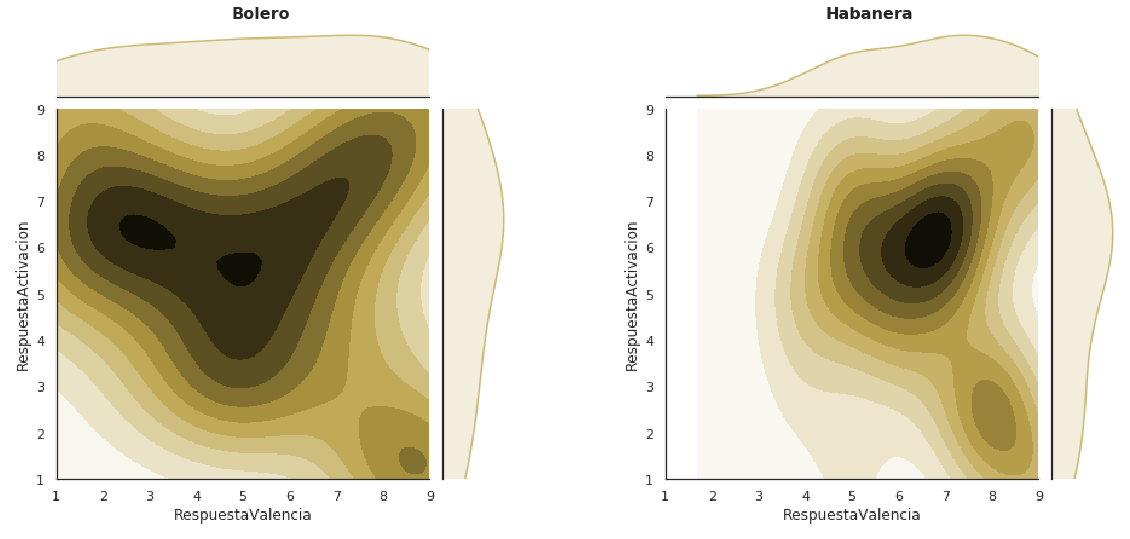

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

#matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('bolero_plot.png')
img_B = mpimg.imread('habanera_plot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].set_title("Bolero",fontweight="bold", size=16)
ax[0].axis('off')
ax[1].imshow(img_B);
ax[1].set_title("Habanera",fontweight="bold", size=16)
ax[1].axis('off')

### Pasodoble vs Jota

(-0.5, 419.5, 419.5, -0.5)

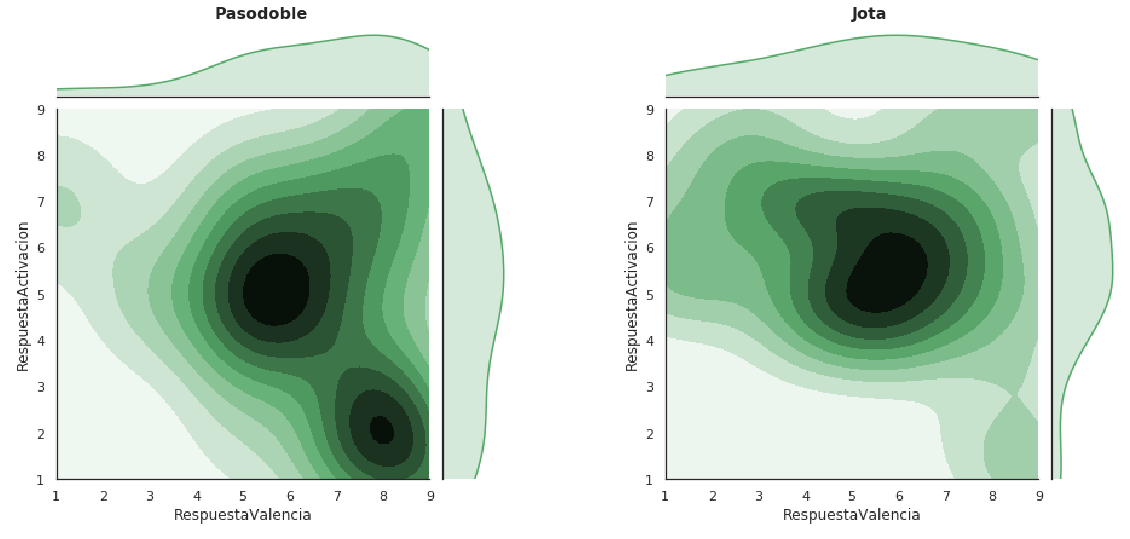

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

#matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('pasodoble_plot.png')
img_B = mpimg.imread('jota_plot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].set_title("Pasodoble",fontweight="bold", size=16)
ax[0].axis('off')
ax[1].imshow(img_B);
ax[1].set_title("Jota",fontweight="bold", size=16)
ax[1].axis('off')

### Fandango vs Petenera

(-0.5, 419.5, 419.5, -0.5)

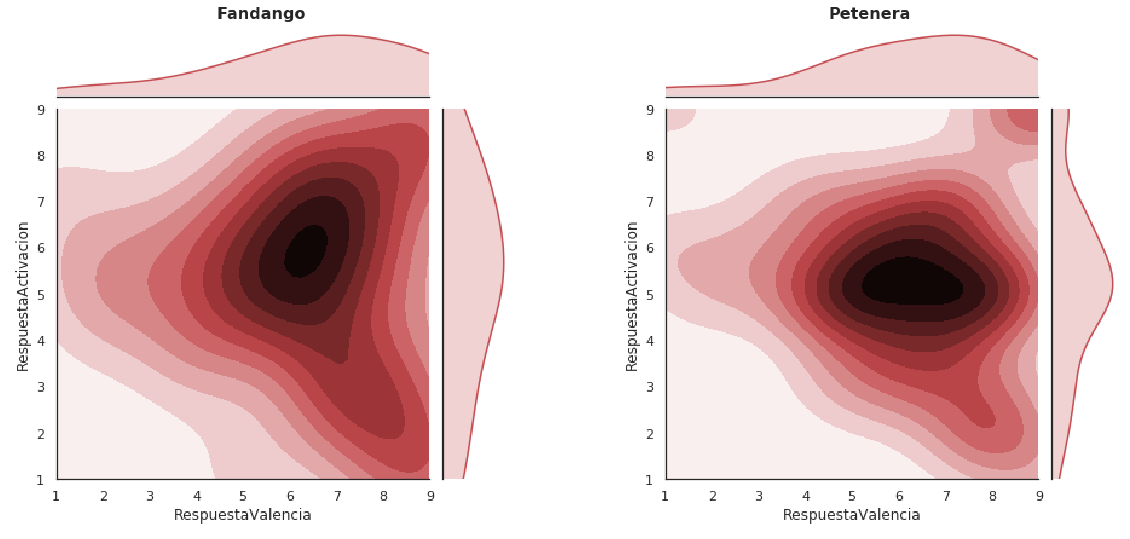

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

#matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('fandango_plot.png')
img_B = mpimg.imread('petenera_plot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].set_title("Fandango",fontweight="bold", size=16)
ax[0].axis('off')
ax[1].imshow(img_B);
ax[1].set_title("Petenera",fontweight="bold", size=16)
ax[1].axis('off')

### Swing vs Twist 

(-0.5, 419.5, 419.5, -0.5)

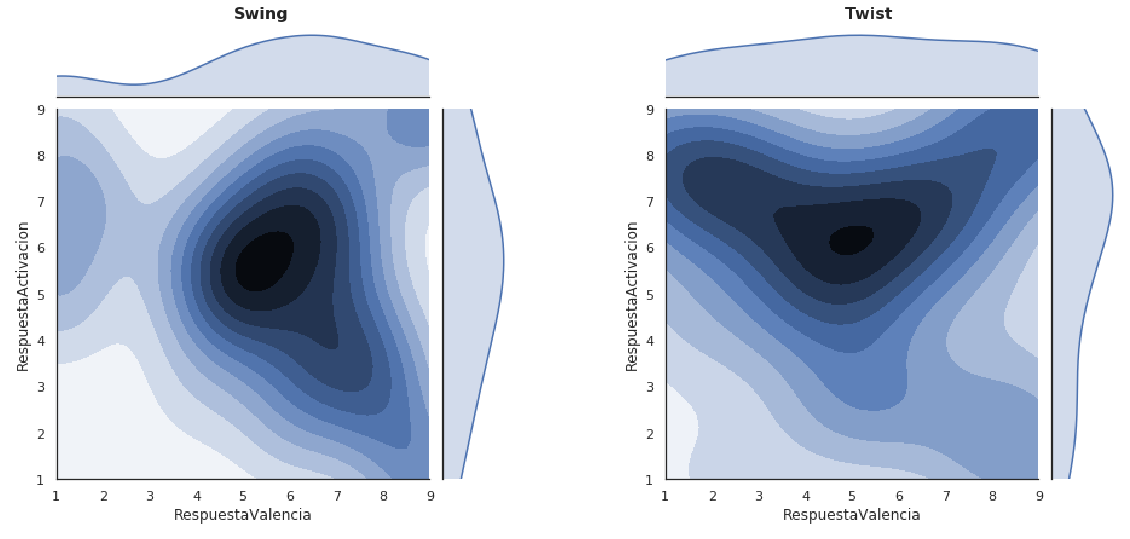

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

#matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('swing_plot.png')
img_B = mpimg.imread('twist_plot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].set_title("Swing",fontweight="bold", size=16)
ax[0].axis('off')
ax[1].imshow(img_B);
ax[1].set_title("Twist",fontweight="bold", size=16)
ax[1].axis('off')

### Combinacion de todos los estilos y generos

(-0.5, 419.5, 419.5, -0.5)

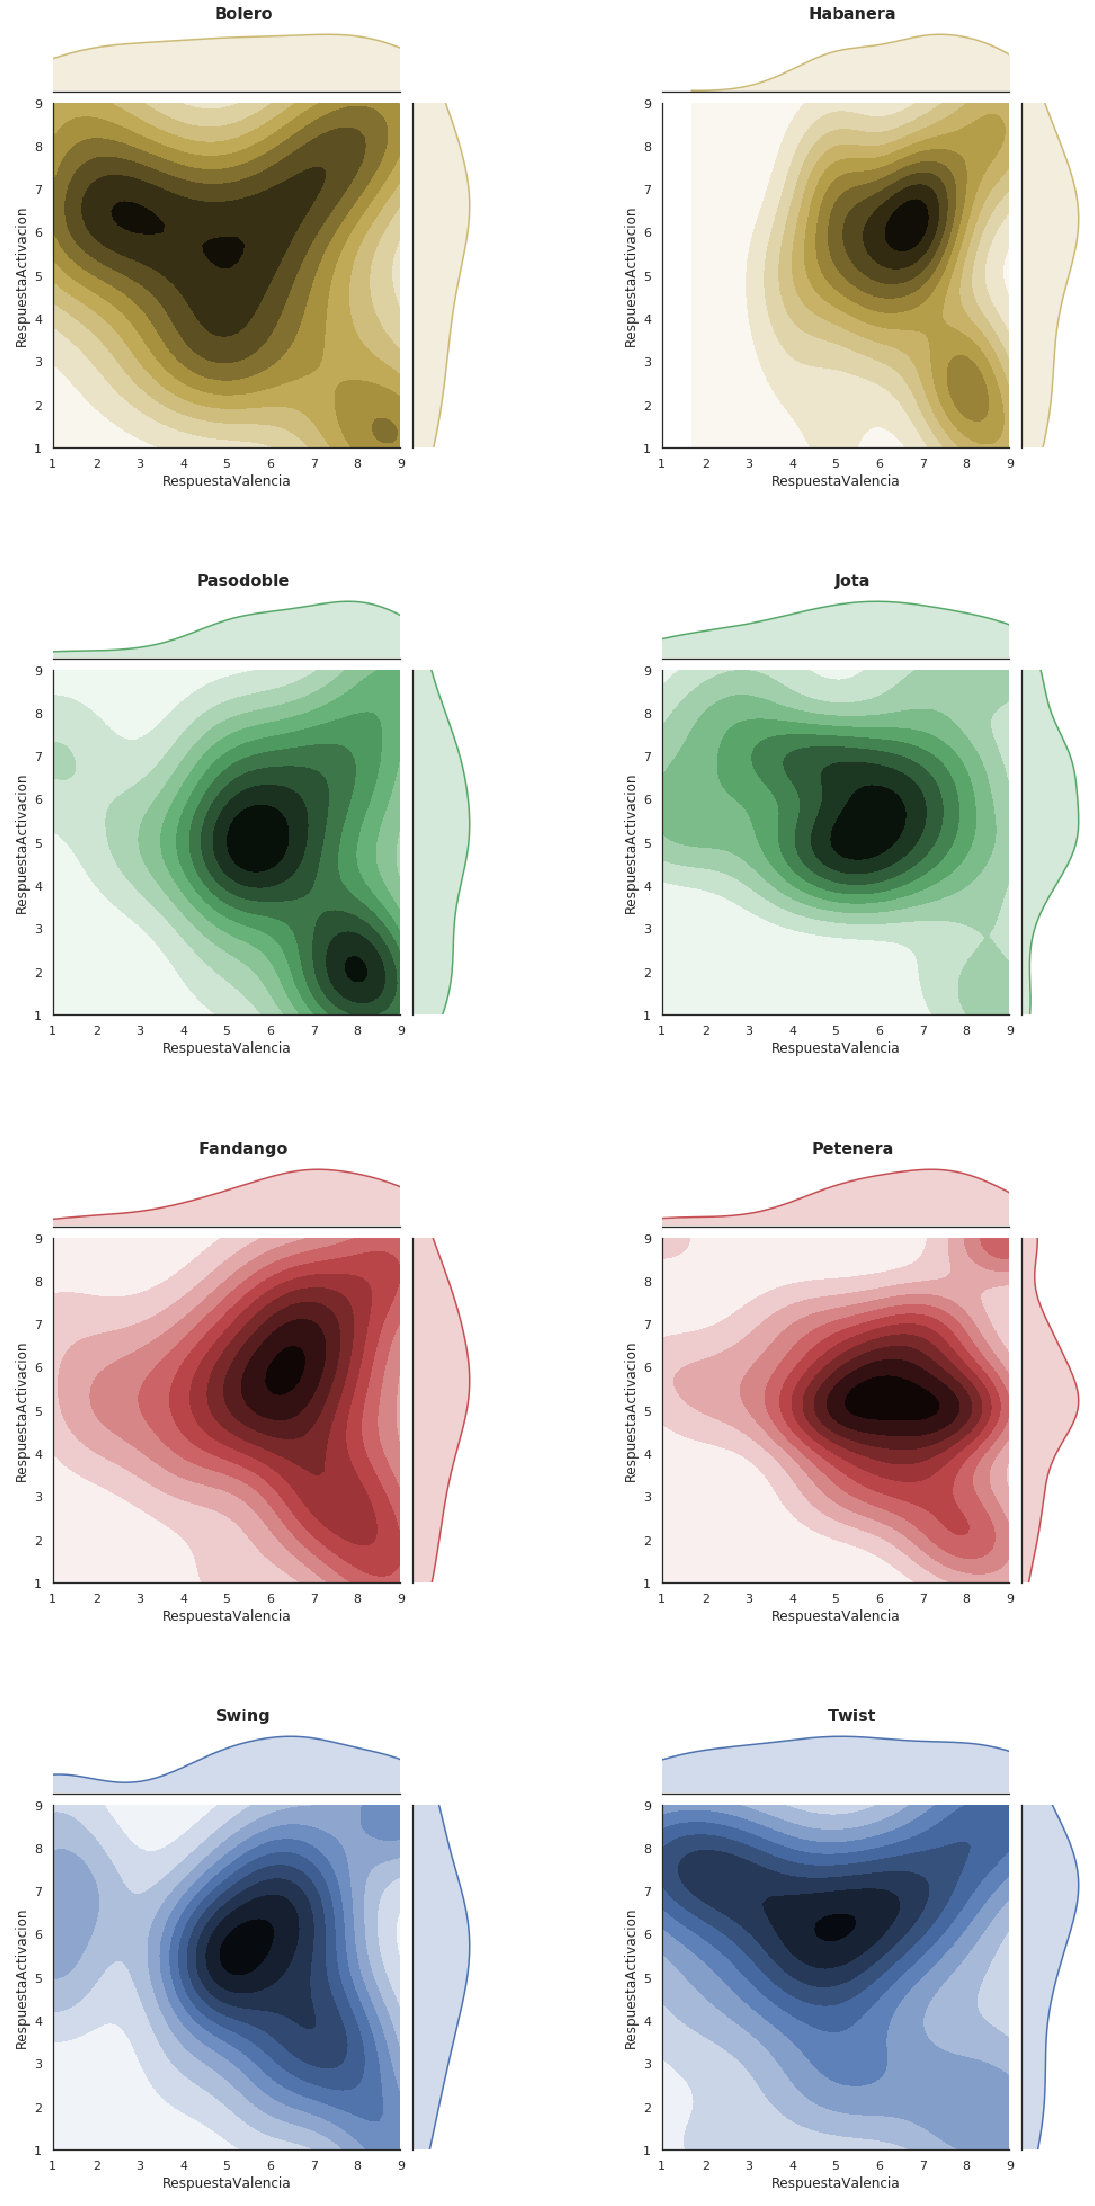

In [70]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,40

# read images
img_A = mpimg.imread('bolero_plot.png')
img_B = mpimg.imread('habanera_plot.png')
# read images
img_C = mpimg.imread('pasodoble_plot.png')
img_D = mpimg.imread('jota_plot.png')

img_E = mpimg.imread('fandango_plot.png')
img_F = mpimg.imread('petenera_plot.png')

img_G = mpimg.imread('swing_plot.png')
img_H = mpimg.imread('twist_plot.png')

# display images
fig, ax = plt.subplots(4,2)
#fig.suptitle('Comparativa entre los distintos estilos musicales perteneciente a un genero.',fontweight="bold", size=16)
# display images
#BOLERO Y HABANERA
ax[0,0].imshow(img_A);
ax[0,0].set_title("Bolero",fontweight="bold", size=16)
ax[0,0].axis('off')
ax[0,1].imshow(img_B);
ax[0,1].set_title("Habanera",fontweight="bold", size=16)
ax[0,1].axis('off')

##PASODOBLE Y JOTA 
# display images
ax[1,0].imshow(img_C);
ax[1,0].set_title("Pasodoble",fontweight="bold", size=16)
ax[1,0].axis('off')
ax[1,1].imshow(img_D);
ax[1,1].set_title("Jota",fontweight="bold", size=16)
ax[1,1].axis('off')

##FANDANGO Y PETENERA
ax[2,0].imshow(img_E);
ax[2,0].set_title("Fandango",fontweight="bold", size=16)
ax[2,0].axis('off')
ax[2,1].imshow(img_F);
ax[2,1].set_title("Petenera",fontweight="bold", size=16)
ax[2,1].axis('off')

## SWING Y TWIST
ax[3,0].imshow(img_G);
ax[3,0].set_title("Swing",fontweight="bold", size=16)
ax[3,0].axis('off')
ax[3,1].imshow(img_H);
ax[3,1].set_title("Twist",fontweight="bold", size=16)
ax[3,1].axis('off')